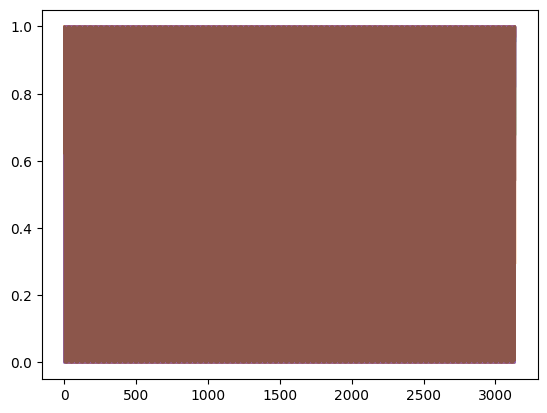

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x = np.arange(0, 1000 * np.pi, 0.1)
length = len(x)//63
x = x[:length*63]
y = np.sin(x)
y2 = np.cos(x)
y3 = y + y2

data1 = np.array([y, y2, y3])

def find_period(signal):
    periods = []
    for i in range(len(signal)):
        sing = signal[i]
        acf = np.correlate(sing, sing, 'full')[-len(sing):]
        inflection = np.diff(np.sign(np.diff(acf)))
        peaks = (inflection < 0).nonzero()[0] + 1
        periods.append(peaks[acf[peaks].argmax()])
    return int(np.median(periods))

def generate_combination(data1, permutation):
    y4 = np.sin(data1[permutation[0]])
    y5 = np.cos(data1[permutation[1]])
    y6 = np.tan(data1[permutation[2]])
    return y4, y5, y6

to_generate = len(y)
steps = 63
y4, y5, y6 = np.zeros_like(y), np.zeros_like(y), np.zeros_like(y)
for i in range(to_generate//steps):
    y4[i*steps:(i+1)*steps], y5[i*steps:(i+1)*steps], y6[i*steps:(i+1)*steps] = generate_combination(data1[:,  i*steps:(i+1)*steps], [0, 1, 2])
    

data = pd.DataFrame(columns=['sin', 'cos', 'sin_cos', 'scos', 'csin', 'tan'])
data['sin'] = y
data['cos'] = y2


data['sin_cos'] = y3
data['scos'] = y4
data['csin'] = y5
data['tan'] = y6

scaler = MinMaxScaler()

data = scaler.fit_transform(data)
# data.to_json('./data/SynteticSin/data.json')
# data = (data - data.max(axis = 0))/(data.min(axis=0)-data.max(axis=0))
plt.plot(x, data)
plt.show()

In [11]:
data = data.reshape(length, 63, 6)

In [12]:
np.save('./Datasets/SyntheticSinDataset', data)
np.save('./Datasets/SyntheticSinScaler', scaler)